### This is an introduction to Machine Learning or Lets say it as an Hello Machine Learning.

We are using a toy dataset of the passengers of the Titanic on her last voyage.

This notebook is will be able to predict if a given passenger will survival the Titanic disaster (for us, we are fictioning).

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
# from scipy.special import boxcox1 # for statiscal functions
# from scipy.stats import skew, skewnorm

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Get Data

In [2]:
titanic_train = pd.read_csv('data/titanic/train.csv')
titanic_test = pd.read_csv('data/titanic/test.csv')

# join the split for a uniform entry
titanic_df = pd.concat([titanic_train, titanic_test])

In [3]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_df = titanic_df.set_index('PassengerId')

In [5]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C



FEATURE --->	DESCRIPTION

Survived --->	Survival

Pclass --->	Ticket Class

Name --->	Name

Sex	---> Sex

Age --->	Age (Years)

SibSp --->	Number of Siblings/Spouses Aboard

Parch --->	Number of Parents/Children Aboard

Ticket --->	Ticket Number

Fare --->	Passenger Fare

Cabin --->	Cabin Number

Embarked ---> Port of Embarkation

In [7]:
# get the info about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


All	attributes	are	numerical,	except	the	Name, Sex, Cabin, Ticket     and Embarked.

You	can	find	out	what	categories	exist and	how	many each object 	belong	to	a	category.

In [8]:
obj = ['Sex', 'Cabin', 'Ticket', 'Embarked']

for _ in obj:

    print('-----------')
    print(titanic_df[_].value_counts())
    print()
    

-----------
male      843
female    466
Name: Sex, dtype: int64

-----------
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F4                 4
                  ..
B11                1
B101               1
E10                1
B50                1
D40                1
Name: Cabin, Length: 186, dtype: int64

-----------
CA. 2343           11
1601                8
CA 2144             8
347077              7
347082              7
                   ..
5727                1
367231              1
SC 14888            1
SOTON/OQ 392086     1
AQ/3. 30631         1
Name: Ticket, Length: 929, dtype: int64

-----------
S    914
C    270
Q    123
Name: Embarked, dtype: int64



25% of the passengers are in the age lower than 21, while 50% are lower than 28 and 75% are lower than 39. Also often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

In [9]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### let have an insight on the raw data

as we can see, passengerId,  is not needed to be added to the ML model. Else it will shoot up the predictions making it an unfavorable model.

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Administrator\anaconda3\lib\site

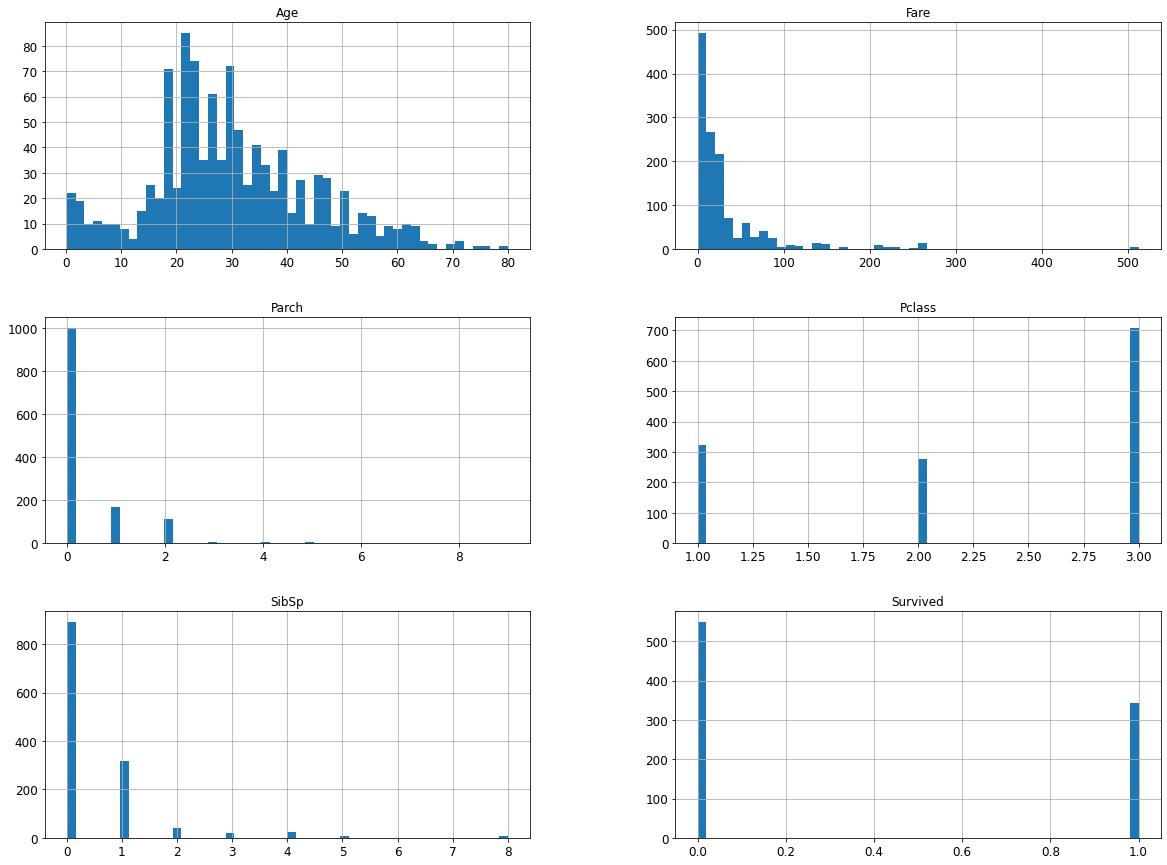

In [10]:
titanic_df.hist(bins=50, figsize=(20, 15));
plt.show();

Note: there are missin values in the data, which are (age, cabin), we'll deal with it.

Remember we want to predict whether Mr. Joe Parker will survive the titanic disaster, lets create a dummy dataFrame about him and add it to the end of titanic_df.
    When the titanic_df is transformed, Mr.Joe Parker dataFrame too will.

In [11]:
titanic_df = titanic_df.append({
    
     'Pclass': 2,
    'Name': 'Kani, Mr.Joe Parker',
    'Sex': 'male',
    'Age': 24,
    'SibSp': 0,
    'Parch': 1,
    'Ticket': 114578,
    'Cabin': np.NaN,
    'Fare': 80.4,
    'Embarked': 'C',
    
}, ignore_index=True)

titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
1309,NaN,2,"Kani, Mr.Joe Parker",male,24.0,0,1,114578,80.4000,NaN,C


We need only numerical data for our machine learning models. So we are going to remove  object data types from the dataframe.

since Survived is the target columnn and its in float64, convert to bool.

Pclass, Sex and Embarked are objects, make pandas aware that the classify standards.

converting mismatched data types

In [12]:
# convert to bool()
titanic_df.Survived = titanic_df.Survived.astype(bool)

# since Pclass, Sex and Embarked are objects, convert to category
titanic_df.Pclass = titanic_df.Pclass.astype('category')
titanic_df.Sex = titanic_df.Sex.astype('category')
titanic_df.Embarked = titanic_df.Embarked.astype('category')

### Feature Engineering

This is usually done to make the data a fine grain for the ML model. Since we have less data to make accurate prediction, feature engineering is set to place to help increase the predictive power of the model by adding a few extra columns.

In [13]:
titanic_df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The name column is really needed for prediction but extracting the titles of the passenger can be used as an indicator for socio-economic class.

In [14]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df = titanic_df.copy()

In [16]:
# using pandas regex function
titanic_df['Title'] = titanic_df.Name.str.extract(r' ([^\s]+)\.')
titanic_df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [17]:
# list a the unique titles and their counts
titanic_df.Title.value_counts()

Mr          758
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Dona          1
Countess      1
Jonkheer      1
Mme           1
Capt          1
Lady          1
Don           1
Sir           1
Name: Title, dtype: int64

In [18]:
# group uncommon titles together, by replacing the with 'Rare'
titanic_df.replace({
    'Capt': 'Rare',
    'Col': 'Rare',
    'Countess': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Jonkheer': 'Rare',
    'Lady': 'Rare',
    'Major': 'Rare',
    'Master': 'Master',
    'Miss': 'Ms',
    'Mlle': 'Ms',
    'Mme': 'Mrs',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Ms': 'Ms',
    'Rev': 'Rare',
    'Dona':  'Rare',
    'Sir': 'Rare',
}, inplace=True)

titanic_df.Title.value_counts()

Mr        758
Ms        264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

since there only 5 unique titltes, lets convert the column to the category data type.

In [19]:
titanic_df.Title = titanic_df.Title.astype('category')

In [20]:
# adding potential useful features
titanic_df['FamilySize'] =  titanic_df.SibSp + titanic_df.Parch + 1
titanic_df['TravellingAlone'] = (titanic_df.FamilySize == 1) # if the person was alone

### Imputing Missing Values 

Remember there are missing values in that data and we want to fill in or predict their values.

Lets work on the 3 columns has contain missing values, Age, Cabin and Embarked.

In [21]:
# start with Age
titanic_df.Age.value_counts(dropna=False).head()

NaN     263
24.0     48
22.0     43
21.0     41
30.0     40
Name: Age, dtype: int64

In [22]:
titanic_df['AgeMissing'] = titanic_df.Age.isna()
titanic_df.Age.fillna(0.0, inplace=True)

In [23]:
# cabin
titanic_df.Cabin.value_counts(dropna=False).head()

NaN                1015
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
Name: Cabin, dtype: int64

In [24]:
# nearly all the values are Nan. Better we drop the entire column
titanic_df.drop('Cabin', axis=1, inplace=True)

In [25]:
# Embarked
titanic_df.Embarked.value_counts(dropna=False).head()

S      914
C      271
Q      123
NaN      2
Name: Embarked, dtype: int64

Majority of people from S embarked, and there only 2 Nans, lets assume the 2 people also embarked at S

In [26]:
titanic_df.Embarked.fillna('S', inplace=True)

In [27]:
# Fare
titanic_df.Fare.value_counts(dropna=False).head()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
Name: Fare, dtype: int64

In [28]:
titanic_df.Fare.fillna(0.0, inplace=True)

In [29]:
# lets see what we cooked so far
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         1310 non-null   bool    
 1   Pclass           1310 non-null   category
 2   Name             1310 non-null   object  
 3   Sex              1310 non-null   category
 4   Age              1310 non-null   float64 
 5   SibSp            1310 non-null   int64   
 6   Parch            1310 non-null   int64   
 7   Ticket           1310 non-null   object  
 8   Fare             1310 non-null   float64 
 9   Embarked         1310 non-null   category
 10  Title            1310 non-null   category
 11  FamilySize       1310 non-null   int64   
 12  TravellingAlone  1310 non-null   bool    
 13  AgeMissing       1310 non-null   bool    
dtypes: bool(3), category(4), float64(2), int64(3), object(2)
memory usage: 81.2+ KB


Our ML model can only work on features that are number but not object, we have to remove the Name and Ticket column.

In [30]:
titanic_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [31]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,TravellingAlone,AgeMissing
0,False,3,male,22.0,1,0,7.2500,S,Mr,2,False,False
1,True,1,female,38.0,1,0,71.2833,C,Mrs,2,False,False
2,True,3,female,26.0,0,0,7.9250,S,Ms,1,True,False
3,True,1,female,35.0,1,0,53.1000,S,Mrs,2,False,False
4,False,3,male,35.0,0,0,8.0500,S,Mr,1,True,False


## Encoding Nominal Categorical Feature

If you have a feature with nominal classes that has no intrinsic ordering (e.g., male, Mr, True, false), we use  One-hot encode the represent these features as 1's and 0's.

Let's One-hot encode the feature using pandas built-in pd.get_dummies(titanic_df) Or you can use  scikit-learn’s LabelBinarizer.

In [32]:
# one-hot encode data
titanic_df = pd.get_dummies(titanic_df)
titanic_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'TravellingAlone', 'AgeMissing', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rare'],
      dtype='object')

In [33]:
titanic_df.head()

,Survived,Age,SibSp,Parch,Fare,FamilySize,TravellingAlone,AgeMissing,Pclass_1,Pclass_2,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,False,22.0,1,0,7.2500,2,False,False,0,0,...,0,1,0,0,1,0,1,0,0,0
1,True,38.0,1,0,71.2833,2,False,False,1,0,...,1,0,1,0,0,0,0,1,0,0
2,True,26.0,0,0,7.9250,1,True,False,0,0,...,1,0,0,0,1,0,0,0,1,0
3,True,35.0,1,0,53.1000,2,False,False,1,0,...,1,0,0,0,1,0,0,1,0,0
4,False,35.0,0,0,8.0500,1,True,False,0,0,...,0,1,0,0,1,0,1,0,0,0


In [34]:
backup_df = titanic_df.copy()

In [35]:
# transform the target column
target_values = {True:1, False:0}

target = backup_df['Survived']
backup_df.drop('Survived', axis=1, inplace=True) # drop at the column as

target = target.map(target_values)

In [36]:
target

0       0
1       1
2       1
3       1
4       0
       ..
1305    1
1306    1
1307    1
1308    1
1309    1
Name: Survived, Length: 1310, dtype: int64

In [37]:
backup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1310 non-null   float64
 1   SibSp            1310 non-null   int64  
 2   Parch            1310 non-null   int64  
 3   Fare             1310 non-null   float64
 4   FamilySize       1310 non-null   int64  
 5   TravellingAlone  1310 non-null   bool   
 6   AgeMissing       1310 non-null   bool   
 7   Pclass_1         1310 non-null   uint8  
 8   Pclass_2         1310 non-null   uint8  
 9   Pclass_3         1310 non-null   uint8  
 10  Sex_female       1310 non-null   uint8  
 11  Sex_male         1310 non-null   uint8  
 12  Embarked_C       1310 non-null   uint8  
 13  Embarked_Q       1310 non-null   uint8  
 14  Embarked_S       1310 non-null   uint8  
 15  Title_Master     1310 non-null   uint8  
 16  Title_Mr         1310 non-null   uint8  
 17  Title_Mrs     

In [38]:
# TravellingAlone and AgeMissing are still bool, change to numerical
tmp_TravellingAlone = backup_df.TravellingAlone
backup_df['TravellingAlone'] = tmp_TravellingAlone.map(target_values)

tmp_AgeMissing = backup_df.AgeMissing
backup_df['AgeMissing'] = tmp_AgeMissing.map(target_values)

In [39]:
backup_df.head()

,Age,SibSp,Parch,Fare,FamilySize,TravellingAlone,AgeMissing,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,22.0,1,0,7.2500,2,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
1,38.0,1,0,71.2833,2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,26.0,0,0,7.9250,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,35.0,1,0,53.1000,2,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
4,35.0,0,0,8.0500,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0


In [40]:
backup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1310 non-null   float64
 1   SibSp            1310 non-null   int64  
 2   Parch            1310 non-null   int64  
 3   Fare             1310 non-null   float64
 4   FamilySize       1310 non-null   int64  
 5   TravellingAlone  1310 non-null   int64  
 6   AgeMissing       1310 non-null   int64  
 7   Pclass_1         1310 non-null   uint8  
 8   Pclass_2         1310 non-null   uint8  
 9   Pclass_3         1310 non-null   uint8  
 10  Sex_female       1310 non-null   uint8  
 11  Sex_male         1310 non-null   uint8  
 12  Embarked_C       1310 non-null   uint8  
 13  Embarked_Q       1310 non-null   uint8  
 14  Embarked_S       1310 non-null   uint8  
 15  Title_Master     1310 non-null   uint8  
 16  Title_Mr         1310 non-null   uint8  
 17  Title_Mrs     

we can see two nearby values are more similar than two distant values.The FamilySize has 1 and 2, Fare has decimal point numbers but ML algorithm should be able to read the data; So we one hot encode it.

In [41]:
backup_df.head()

,Age,SibSp,Parch,Fare,FamilySize,TravellingAlone,AgeMissing,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,22.0,1,0,7.2500,2,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
1,38.0,1,0,71.2833,2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,26.0,0,0,7.9250,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,35.0,1,0,53.1000,2,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
4,35.0,0,0,8.0500,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0


Machine Learning algorithms work better when the data is as close to symmetric as possible. We can see that th Fare column have a mix of high and low value which can make the model predictive power low. So when we scale the data between 1 to 0 it will make the data uniform.

In [42]:
# Scaling Numerical data set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in backup_df:
    backup_df[i] = sc.fit_transform(backup_df[[i]])

In [43]:
backup_df.head()

,Age,SibSp,Parch,Fare,FamilySize,TravellingAlone,AgeMissing,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,-0.106820,0.481795,-0.445626,-0.503752,0.073324,-1.232571,-0.501192,-0.572061,-0.519018,0.920691,-0.743056,0.743056,-0.510713,-0.321905,0.655844,-0.220996,0.853365,-0.421969,-0.502384,-0.150461
1,0.803440,0.481795,-0.445626,0.734230,0.073324,-1.232571,-0.501192,1.748064,-0.519018,-1.086140,1.345793,-1.345793,1.958047,-0.321905,-1.524753,-0.220996,-1.171831,2.369844,-0.502384,-0.150461
2,0.120745,-0.478862,-0.445626,-0.490702,-0.558614,0.811312,-0.501192,-0.572061,-0.519018,0.920691,1.345793,-1.345793,-0.510713,-0.321905,0.655844,-0.220996,-1.171831,-0.421969,1.990508,-0.150461
3,0.632766,0.481795,-0.445626,0.382685,0.073324,-1.232571,-0.501192,1.748064,-0.519018,-1.086140,1.345793,-1.345793,-0.510713,-0.321905,0.655844,-0.220996,-1.171831,2.369844,-0.502384,-0.150461
4,0.632766,-0.478862,-0.445626,-0.488285,-0.558614,0.811312,-0.501192,-0.572061,-0.519018,0.920691,-0.743056,0.743056,-0.510713,-0.321905,0.655844,-0.220996,0.853365,-0.421969,-0.502384,-0.150461


In [44]:
# X = backup_df[:-1].drop('Survived', axis=1)
# y = backup_df[:-1].Survived.values.ravel()

In [45]:
X = backup_df
y = target

In [46]:
X.head()

,Age,SibSp,Parch,Fare,FamilySize,TravellingAlone,AgeMissing,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,-0.106820,0.481795,-0.445626,-0.503752,0.073324,-1.232571,-0.501192,-0.572061,-0.519018,0.920691,-0.743056,0.743056,-0.510713,-0.321905,0.655844,-0.220996,0.853365,-0.421969,-0.502384,-0.150461
1,0.803440,0.481795,-0.445626,0.734230,0.073324,-1.232571,-0.501192,1.748064,-0.519018,-1.086140,1.345793,-1.345793,1.958047,-0.321905,-1.524753,-0.220996,-1.171831,2.369844,-0.502384,-0.150461
2,0.120745,-0.478862,-0.445626,-0.490702,-0.558614,0.811312,-0.501192,-0.572061,-0.519018,0.920691,1.345793,-1.345793,-0.510713,-0.321905,0.655844,-0.220996,-1.171831,-0.421969,1.990508,-0.150461
3,0.632766,0.481795,-0.445626,0.382685,0.073324,-1.232571,-0.501192,1.748064,-0.519018,-1.086140,1.345793,-1.345793,-0.510713,-0.321905,0.655844,-0.220996,-1.171831,2.369844,-0.502384,-0.150461
4,0.632766,-0.478862,-0.445626,-0.488285,-0.558614,0.811312,-0.501192,-0.572061,-0.519018,0.920691,-0.743056,0.743056,-0.510713,-0.321905,0.655844,-0.220996,0.853365,-0.421969,-0.502384,-0.150461


In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Model

In [48]:
from sklearn.model_selection import train_test_split

# uniformly split the data for  train test; 70% for train, 40%  test
X_train, X_test, y_train, y_test = train_test_split(X, y)

We using a ML algorithm called Random Forest Classifier. It makes decision tress based on the features in X.

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
random_forest_model = RandomForestClassifier(n_estimators=10, bootstrap=False)
random_forest_model.fit(X_train, y_train)

print(f'Train Accuracy: {random_forest_model.score(X_train, y_train)*100:.3f}%')

Train Accuracy: 94.094%


In [51]:
print(f'Test Accuracy: {random_forest_model.score(X_test, y_test)*100:.3f}%')

Test Accuracy: 68.598%


In [52]:
# did Kani, Mr.Joe Parker survived?
moment_of_truth = {1:'Yes', 0:'No'}

# backup_df[backup_df.index == 5], incase you want to search for a particular row
search_for = backup_df.tail(1) # .head(1) is for the actual data. But for kani, use .tail(1)

moment_of_truth[int(random_forest_model.predict(search_for))]

'No'

In [53]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(C=6.951927961, penalty='l2', random_state=42)

log_model.fit(X_train, y_train)

print(f'Train Accuracy: {log_model.score(X_train, y_train)*100:.3f}%')


Train Accuracy: 70.061%


In [54]:
print(f'Test Accuracy: {log_model.score(X_test, y_test)*100:.3f}%')

Test Accuracy: 71.037%


In [55]:
# did Kani, Mr.Joe Parker survived?
moment_of_truth = {1:'Yes', 0:'No'}

search_for = backup_df.tail(1) # .head(1) is for the actual data. But for kani, use .tail(1)

moment_of_truth[int(log_model.predict(search_for))]

'Yes'

[Note]
1. The model is unlikely to be useful at all if the model doesn't match the training data closely enough (underfitting). So, on both the train and test sets, a model that underfits would have poor accuracy. To address this, by increasing model complexity, e.g. by engineering better functionality, enhancing the imputation of missing values, tuning model parameters, and even fully switching models, we need to enhance the model.


2. The model is unlikely to be useful on data that it has not seen before, e.g. the test set, if the model matches the training data too closely (overfitting). So, on the test set, a model that overfits would have much lower accuracy than the training set. To fix this, we can: I train with more data, use only the more important characteristics of the model, and prefer simpler models over complex models.